<a href="https://colab.research.google.com/github/NolanniLB/DS-Unit-2-Applied-Modeling/blob/master/BuildWeek0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My build week project


First I found and uploaded the data which I was going to use. I chose animals because I can't resist their cute furry faces. 

In [1]:
!wget -O Austin_Animal_Center_Outcomes.csv https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD
import pandas as pd
df = pd.read_csv('Austin_Animal_Center_Outcomes.csv')
print(df.shape)
df.head()

--2020-06-25 02:11:24--  https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD
Resolving data.austintexas.gov (data.austintexas.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.austintexas.gov (data.austintexas.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Austin_Animal_Center_Outcomes.csv’

Austin_Animal_Cente     [               <=>  ]  15.92M  3.96MB/s    in 4.0s    

2020-06-25 02:11:28 (4.01 MB/s) - ‘Austin_Animal_Center_Outcomes.csv’ saved [16690711]

(118401, 12)


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


In [2]:
# filled in any missing data 
df.fillna('NAN', inplace=True)

In [3]:
#Wanted this column without months or years attached
df['Age upon Outcome'] = df['Age upon Outcome'].str.extract('(\d+)')
print(df['Age upon Outcome'].head())

0    2
1    1
2    4
3    6
4    2
Name: Age upon Outcome, dtype: object


As I was working down below I descovered that an error came up about missing data so I came back up to insert the cell below to make sure the missing data wouldn't mess up my prediction. 

In [4]:
#after looking at the column a couple of nans splipped through
df['Age upon Outcome'].fillna(0, inplace=True)
df['Age upon Outcome'] = df['Age upon Outcome'].astype(int)
print(df['Age upon Outcome'].head())

0    2
1    1
2    4
3    6
4    2
Name: Age upon Outcome, dtype: int64


In [5]:
# want my target to be in smaller groups
df['Outcome Type']=df['Outcome Type'].replace(to_replace={'Rto-Adopt':'Adoption'}, value=None, method=None)
df['Outcome Type']=df['Outcome Type'].replace(to_replace={'Relocate':'Transfer'}, value=None, method=None)
df['Outcome Type']=df['Outcome Type'].replace(to_replace={'Euthanasia':'Other'}, value=None, method=None)
df['Outcome Type']=df['Outcome Type'].replace(to_replace={'Died':'Other'}, value=None, method=None)
df['Outcome Type']=df['Outcome Type'].replace(to_replace={'Disposal':'Other'}, value=None, method=None)
df['Outcome Type']=df['Outcome Type'].replace(to_replace={'Missing':'Other'}, value=None, method=None)
df['Outcome Type']=df['Outcome Type'].replace(to_replace={'NAN':'Other'}, value=None, method=None)
df['Outcome Type'].value_counts()

Adoption           52792
Transfer           35177
Return to Owner    20781
Other               9651
Name: Outcome Type, dtype: int64

In [6]:
# completing my train/test split
from sklearn.model_selection import train_test_split
train, test = train_test_split( df, train_size=0.80, random_state=42) 
train, val = train_test_split(train, random_state=42)
# defining my target and features for my prediction
target = 'Outcome Type'
features = ['Age upon Outcome','Animal Type','Sex upon Outcome','Breed','Color']

x_train = train[features]
y_train = train[target]
x_val = val[features]
y_val = val[target] 
x_test = test[features]
y_test = test[target]

# the baseline
from sklearn.metrics import accuracy_score
majority_class = y_test.mode()[0]
y_test_pred = [majority_class]*len(y_test)
accuracy_score(y_test, y_test_pred)

0.4477429162619822

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


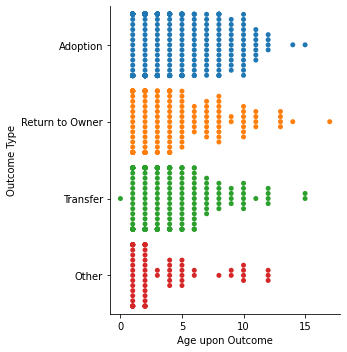

In [7]:
# A visualization to see if I could see if age had an affect on what happens to the animals
import seaborn as sns
sns.catplot(x='Age upon Outcome', y= 'Outcome Type',kind='swarm', data= df.sample(1000));

In [8]:
!pip install -U category_encoders
import category_encoders as ce 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

     |████████████████████████████████| 81kB 2.2MB/s 


In [9]:
# a pipeline for my linear model
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LogisticRegression()
)
pipeline.fit(x_train, y_train)
print(f'Validation accuracy: {pipeline.score(x_val, y_val)}')

Validation accuracy: 0.5153716216216216


This score isn't as good as I would like it to be but still beat the .44 baseline score. 

In [10]:
# pipeline for my random forrest model
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1,max_features='auto',random_state=42)
)
pipeline.fit(x_train, y_train)
print(f'Validation accuracy: {pipeline.score(x_val, y_val)}')

Validation accuracy: 0.628758445945946


In [18]:
# pipeline on test data
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1,max_features='auto',random_state=42)
)
pipeline.fit(x_test, y_test)
print(f'Validation accuracy: {pipeline.score(x_test, y_test)}')

Validation accuracy: 0.8592542544656053


When using this pipeline on my model, I am given an 85 percent accuracy score with the target being the Outcome Type column. 

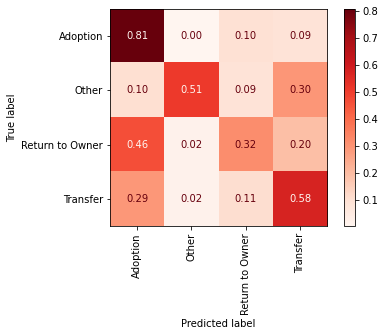

In [12]:
# plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, x_val, y_val,
                      normalize='true',
                      values_format='.2f',
                      xticks_rotation='vertical', cmap='Reds');

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
!pip install -U pdpbox
from pdpbox.pdp import pdp_interact, pdp_interact_plot

     |████████████████████████████████| 57.7MB 69kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=945f16611181b45a4ead028badc0806958185681e96a0046ed8ff95a3d85c54e
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [16]:
# Transforming for my other visualization
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    #SimpleImputer()
)
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

x_train_transform = pipeline.fit_transform(x_train)
x_val_transform = pipeline.transform(x_val)
x_test_transform = pipeline.transform(x_test)

x_train_transform = pd.DataFrame(x_train_transform, columns=x_train.columns)
x_val_transform = pd.DataFrame(x_val_transform, columns=x_val.columns)
x_test_transform = pd.DataFrame(x_test_transform, columns=x_test.columns)

model.fit(x_train_transform, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


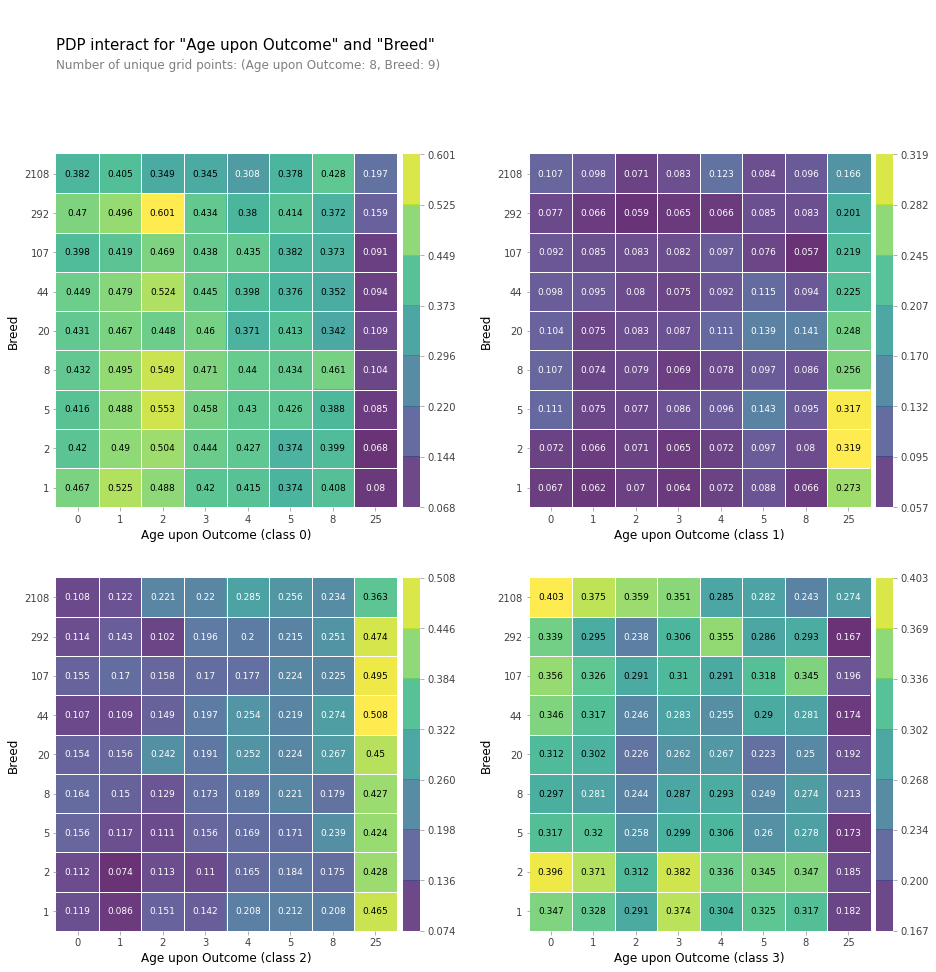

In [17]:
# set up for my visualization
features = ['Age upon Outcome', 'Breed']

interaction = pdp_interact(
    model=model, 
    dataset=x_train_transform, 
    model_features=x_train_transform.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);